In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('C:/Users/edgar/Desktop/Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [3]:
df.groupby('isFraud').size()

isFraud
0    6354407
1       8213
dtype: int64

In [4]:
df.groupby('isFlaggedFraud').size()

isFlaggedFraud
0    6362604
1         16
dtype: int64

In [5]:
df.shape

(6362620, 11)

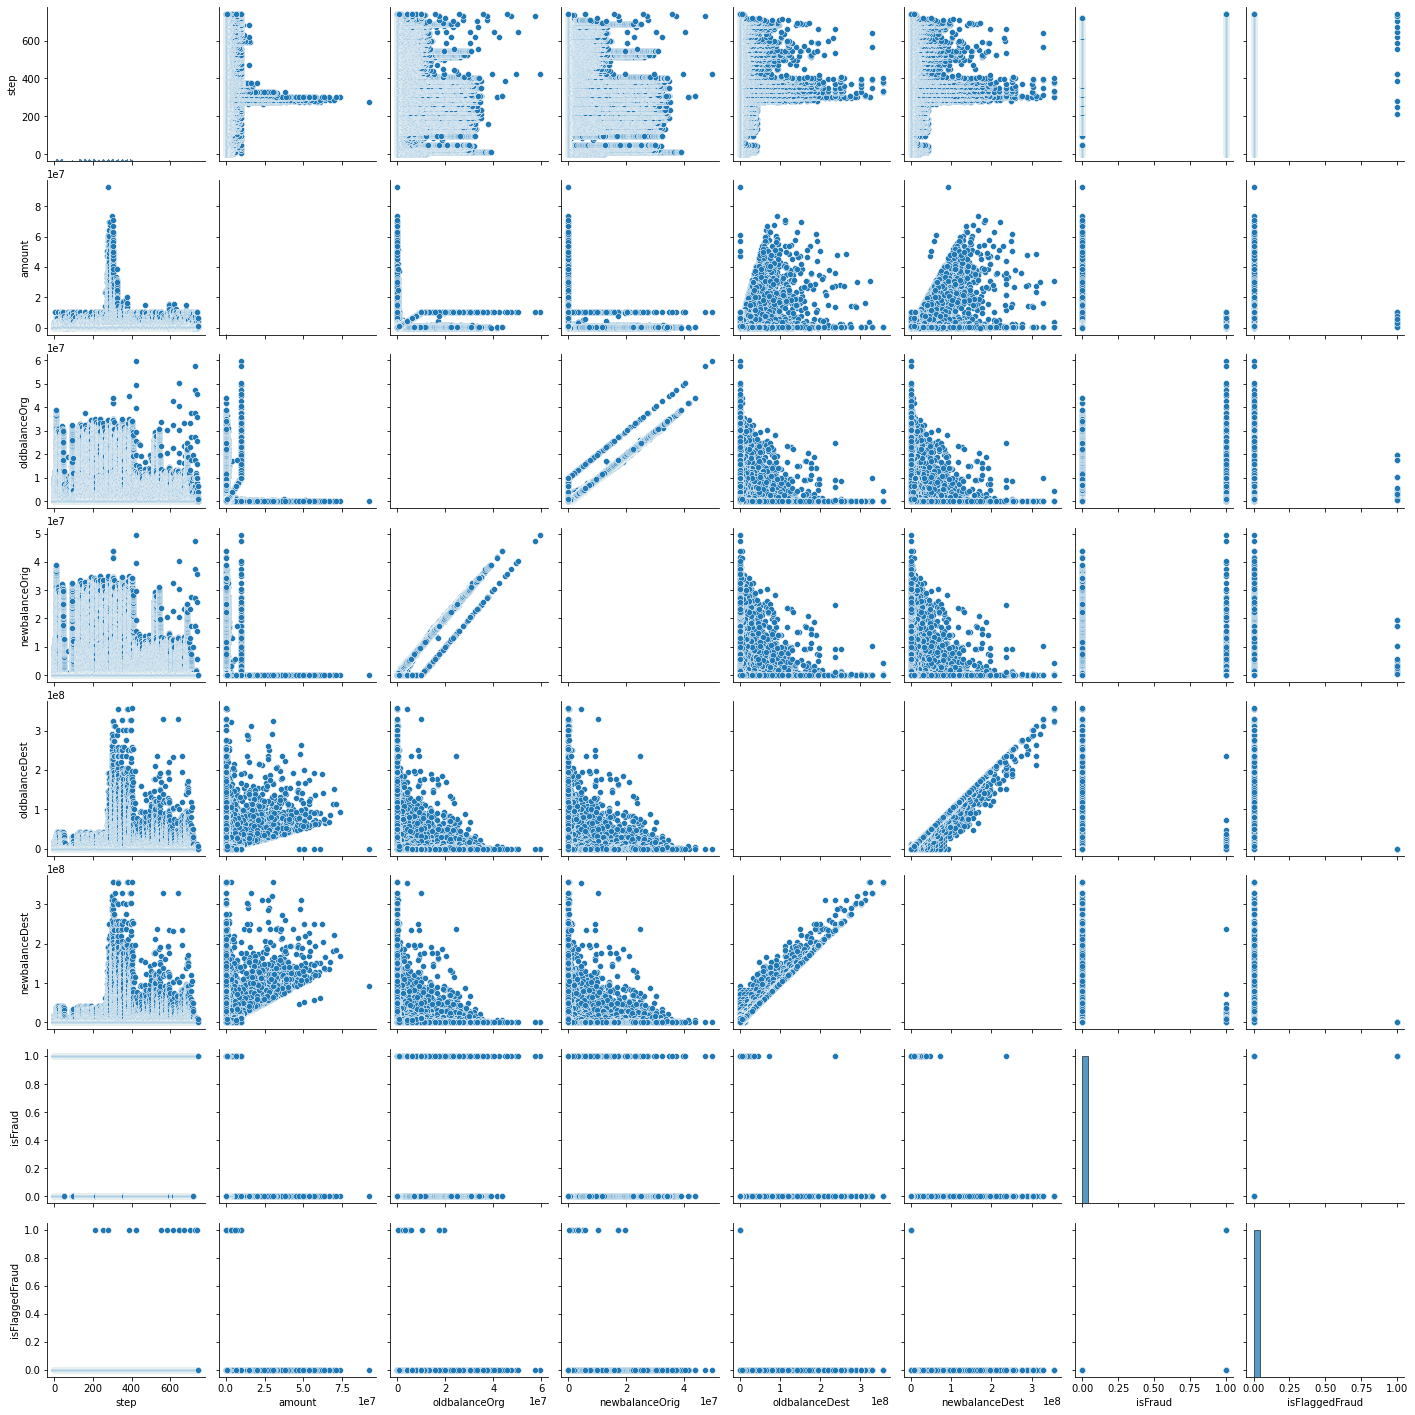

In [7]:
sns.pairplot(df)

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<AxesSubplot:>

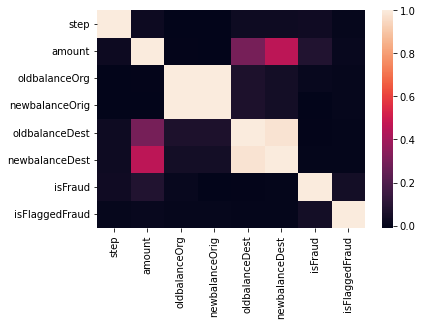

In [10]:
sns.heatmap(df.corr())

In [11]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, PowerTransformer

In [6]:
df_num = df.select_dtypes(include=np.number)
df_num

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0


In [ ]:
for i, column in enumerate(df.columns, 1):
    plt.subplot(4,2,i)
    sns.histplot(df[column])

KeyboardInterrupt: 

In [8]:
tmp_df = df_num.drop(['isFraud', 'isFlaggedFraud'], axis=1)
tmp_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00
1,1,1864.28,21249.00,19384.72,0.00,0.00
2,1,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,1,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,850002.52,850002.52,0.00,0.00,0.00


In [9]:
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(tmp_df), columns=tmp_df.columns)
df_std

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411
...,...,...,...,...,...,...
6362615,3.510123,0.264665,-0.171108,-0.292442,-0.323814,-0.240959
6362616,3.510123,10.153953,1.896491,-0.292442,-0.323814,-0.333411
6362617,3.510123,10.153953,1.896491,-0.292442,-0.303665,1.403027
6362618,3.510123,1.109765,0.005581,-0.292442,-0.323814,-0.333411


C:\Users\edgar\AppData\Local\Temp/ipykernel_21184/3804209529.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_std.hist(ax=ax)


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'oldbalanceOrg'}>,
        <AxesSubplot:title={'center':'newbalanceOrig'}>],
       [<AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>]], dtype=object)

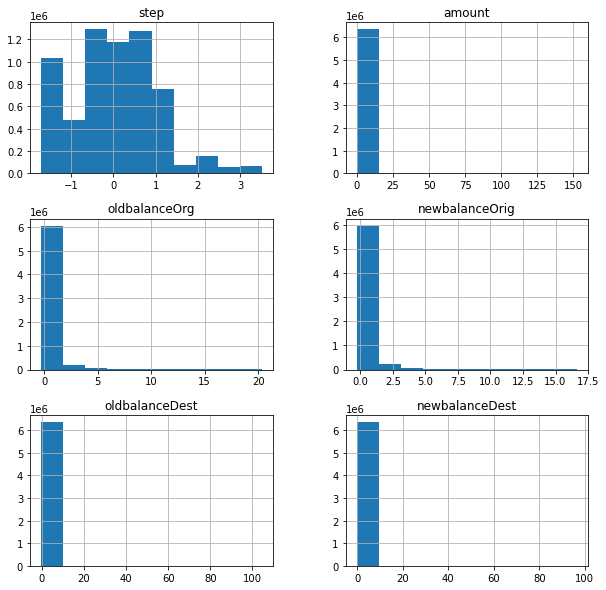

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df_std.hist(ax=ax)

In [11]:
df2 = df_std.join(df[['isFraud', 'isFlaggedFraud']])

In [12]:
df2.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0


In [13]:
min_max_scaler = MinMaxScaler()
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(tmp_df), columns=tmp_df.columns)

C:\Users\edgar\AppData\Local\Temp/ipykernel_21184/2902772087.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_min_max.hist(ax=ax)


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'oldbalanceOrg'}>,
        <AxesSubplot:title={'center':'newbalanceOrig'}>],
       [<AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>]], dtype=object)

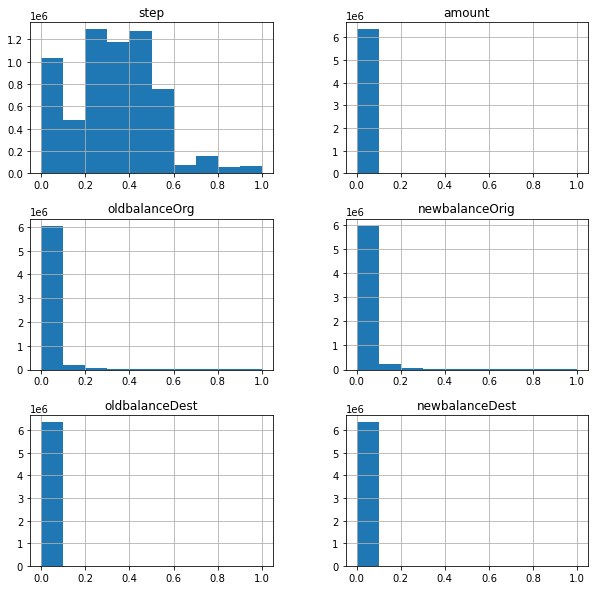

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df_min_max.hist(ax=ax)

In [15]:
scaler_yeo = PowerTransformer()
df_yeo = pd.DataFrame(scaler_yeo.fit_transform(tmp_df), columns=tmp_df.columns)

C:\Users\edgar\AppData\Local\Temp/ipykernel_21184/2355371181.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_yeo.hist(ax=ax)


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'oldbalanceOrg'}>,
        <AxesSubplot:title={'center':'newbalanceOrig'}>],
       [<AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>]], dtype=object)

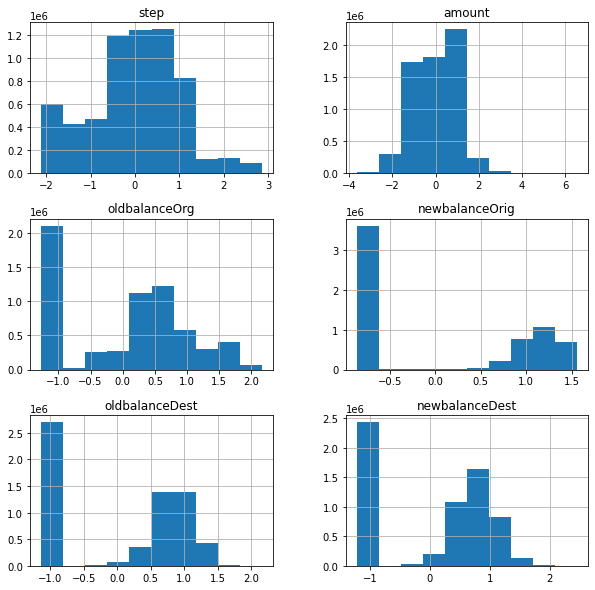

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df_yeo.hist(ax=ax)

<AxesSubplot:>

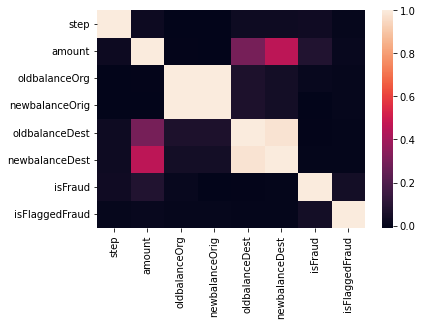

In [42]:
sns.heatmap(df2.corr())

In [43]:
df2.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [69]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_min_max, df[['isFraud', 'isFlaggedFraud']], test_size=0.3, random_state=42)
y_train

,isFraud,isFlaggedFraud
2408104,0,0
662430,0,0
496595,0,0
5053741,0,0
755621,0,0
...,...,...
1570006,0,0
2234489,0,0
4926484,0,0
4304572,0,0


In [48]:
X_train.shape

(4453834, 6)

{'loss': [0.005161057226359844, 0.0028196212369948626], 'accuracy': [0.9910622835159302, 0.9974623918533325], 'val_loss': [0.0031725626904517412, 0.002572706202045083], 'val_accuracy': [1.0, 0.9953729510307312]}
Train: 0.995, Test: 0.995


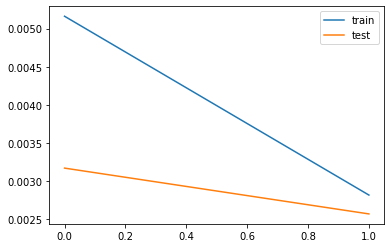

In [88]:
print (history.history)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

[[1906344       7]
 [   2283     152]]


Text(0.5, 257.44, 'Predicted label')

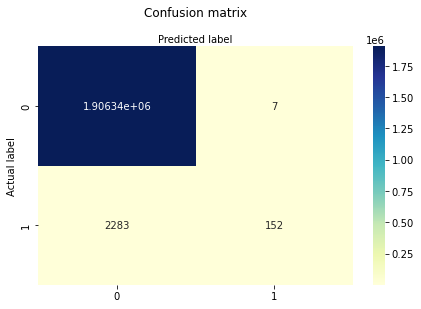

In [36]:
model_min_max = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(
    df_min_max, df['isFraud'], test_size=0.3, random_state=42
)
model_min_max.fit(X_train, y_train)
y_pred = model_min_max.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.9988002845787847
Precision: 0.9559748427672956
Recall: 0.06242299794661191


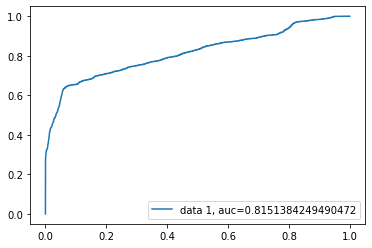

In [38]:
y_pred_proba = model_min_max.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
plt.show()

[[1906335      16]
 [   1189    1246]]


Text(0.5, 257.44, 'Predicted label')

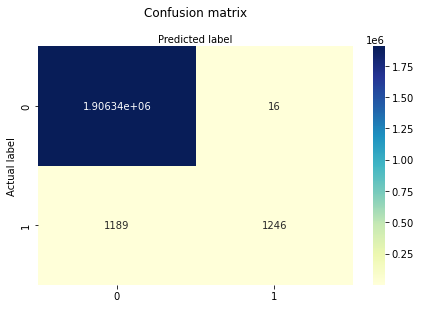

In [41]:
model_yeo = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(
    df_yeo, df['isFraud'], test_size=0.3, random_state=42
)
model_yeo.fit(X_train, y_train)
y_pred = model_yeo.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.9993687086975701
Precision: 0.9873217115689382
Recall: 0.5117043121149897


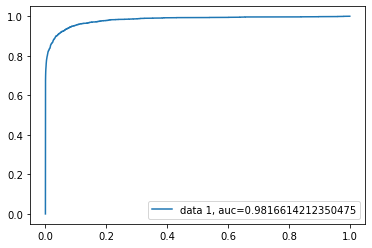

In [42]:
y_pred_proba = model_yeo.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
plt.legend(loc=4)
plt.show()

[[1906250     101]
 [   1409    1026]]


Text(0.5, 257.44, 'Predicted label')

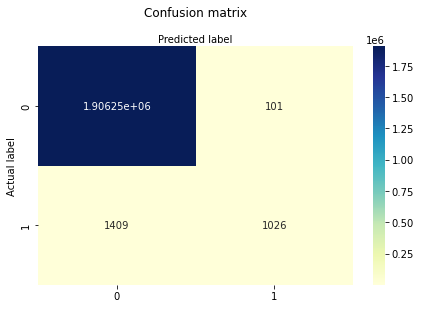

In [43]:
model_std = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(
    df_std, df['isFraud'], test_size=0.3, random_state=42
)
model_std.fit(X_train, y_train)
y_pred = model_std.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.9992089212724737
Precision: 0.9103815439219166
Recall: 0.4213552361396304


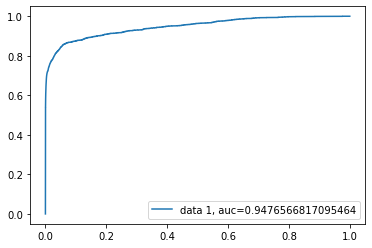

In [44]:
y_pred_proba = model_std.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
plt.legend(loc=4)
plt.show()

[[1904535    1816]
 [   1380    1055]]


Text(0.5, 257.44, 'Predicted label')

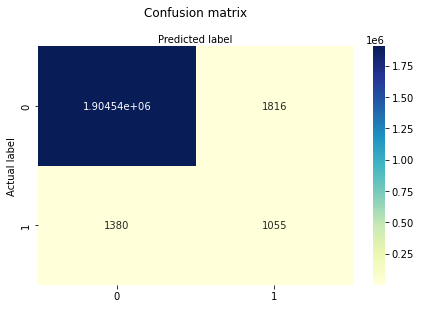

In [45]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(
    df_num, df['isFraud'], test_size=0.3, random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy: 0.9983256373422689
Precision: 0.3674677812608847
Recall: 0.433264887063655


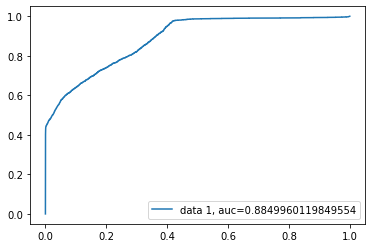

In [46]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
plt.legend(loc=4)
plt.show()